# Chapter 4: Training models


### Linear regression
We start by looking at a linear regression model and two different ways of training it. First using a direct, mathematically closed-form equation giving us the best fit to the training set. Second by using an iterative approach, Gradient Descent, in which a cost function is minimized by tweak the parameters of the model.

Linear regression model prediction:
$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + . . .  + \theta_n x_n = \vec{\theta^T} \vec{x}$$

$\hat{y}$ is the model's predicted value, n is the number of features, $x_i$ is the ith feature's value, and $\theta_i$ is the jth parameter of the model.

A common cost function to minimize is the MSE:
$$ MSE(\theta) = \frac{1}{m} \Sigma_i^m (\theta^T x^i - y^i)$$

$\hat{\theta}$ is the value of $\theta$ that minimzes the MSE above. It is given by the Normal Equation:
$$\hat{\theta} = (X^TX)^{-1} X^T y$$

### Test this out!

We generate some linear data with some noise on top.

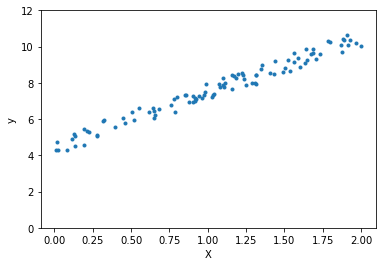

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.rand(100,1)
plt.xlabel("X")
plt.ylabel("y")
plt.ylim(0,12)
plt.plot(X,y, '.')

We use the normal equation from above (and the help of numpy's linalg.inv() function) to calculate $\theta_{best}$ for this data.

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [3]:
theta_best

array([[4.508583  ],
       [2.99902179]])

The actual values used to generate the data were $\theta_0=4$ and $\theta_1=3$ so this is close enough, given that we added the noise on top of the linear model generating the data. We now use the theta_best vector $\hat{\theta}$ to make predictions:

In [4]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [5]:
y_predict

array([[ 4.508583  ],
       [10.50662658]])

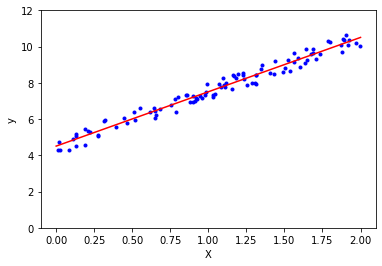

In [6]:
plt.plot(X,y, 'b.')
plt.plot(X_new, y_predict, 'r-')
plt.ylim(0,12)
plt.ylabel("y")
plt.xlabel("X")
plt.show()

We can now do the same with Scikit-Learn. The LinearRegression class is based on the least squares function.

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.508583]), array([[2.99902179]]))

In [8]:
lin_reg.predict(X_new)

array([[ 4.508583  ],
       [10.50662658]])

The least squares function can also be called directly:

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.508583  ],
       [2.99902179]])

Using the Scikit-Learn's Singular Value Decomposition technique can speed up computation times relative to using the closed-form Normal Equation, when the number of features (n) is very large. Using SVD brings the computational complexity from $O(n^{2.4-3})$ to $O(n^2)$

## Gradient descent

Gradient descent is a set of optimization algorithms used to find optimal solutions to many problems. Parameters are iteratively tuned, minimizing a cost function. The gradient of the error function is calculated locally with respect to the parameter vector $\bf{\theta}$, and the parameters are changed in direction of descending gradient. This process is repeated, with gradient then calculated at the new location, until the gradient is zero (meaning the error is minimized).

The parameter vector is randomly populated (called random initialization) and is iteratively improved until the cost function/MSE is minimized.

In gradient descent, the size of the step is called the learning rate. It is a hyperparameter.

If the learning rate is too small, it might take much longer than necessary to move to the optimum. If the learning rate is too large, the parameter vector might skip over the optimum alltogether. 

Lastly, if the cost function has several local minima, gradient descent might congerve on a local minimum rather than the global minimum. Luckily, for linear regression, the MSE is a nice convex function with one minimum.

We first look at implementing Batch Gradient Descent.
The gradient of the parameter vector is calculated over the entire training set (which means it's very slow on large data sets) as shown below:
$$\nabla_{\theta}MSE(\bf{\theta}) = \frac{2}{m}\bf{X}^T(\bf{X\theta} - \bf{y})$$

The parameter vector for the next step is then:
$$\bf{\theta}^{\mathrm{next}\ \mathrm{step}} = \bf{\theta} - \eta \nabla_{\theta} \mathrm{MSE}(\bf{\theta})$$

Implementing this below:

In [10]:
eta = 0.5 # this is the learning rate/scaling the step size
n_iterations = 10
m = 100

gradient_vec = []
theta_vec = []
theta = np.random.randn(2,1) #random intialization

for iterations in np.arange(n_iterations)+1:
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    gradient_vec = np.append(gradient_vec, gradients)
    theta = theta - eta * gradients
    theta_vec = np.append(theta_vec, theta)

In [11]:
y_bgd1 = np.empty(10)
y_bgd2 = np.empty(10)
for iterations in np.arange(n_iterations):
    y_bgd1[iterations] = theta_vec[iterations*2] + theta_vec[iterations*2+1]*min(X)
    y_bgd2[iterations] = theta_vec[iterations*2] + theta_vec[iterations*2+1]*max(X)

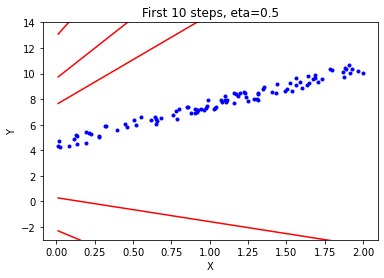

In [12]:
for i in range(10):
    plt.plot([min(X), max(X)],[y_bgd1[i],y_bgd2[i]], 'r-')
plt.plot(X, y, 'b.')
plt.ylim(-3,14)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("First 10 steps, eta=0.5")
plt.show()

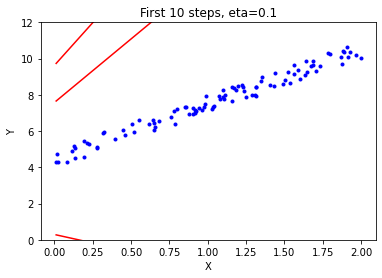

In [13]:
for i in range(10):
    plt.plot([min(X), max(X)],[y_bgd1[i],y_bgd2[i]], 'r-')
plt.plot(X, y, 'b.')
plt.ylim(0,12)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("First 10 steps, eta=0.1")
plt.show()

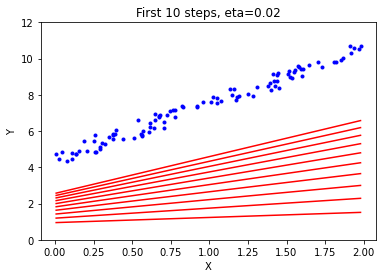

In [63]:
for i in range(10):
    plt.plot([min(X), max(X)],[y_bgd1[i],y_bgd2[i]], 'r-')
plt.plot(X, y, 'b.')
plt.ylim(0,12)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("First 10 steps, eta=0.02")
plt.show()

We see from the three plots above (each with a different learning rate) that a learning rate that is too slow (0.02) leads to an unnecessary number of steps to get to the optimum. A learning rate that's too high (0.5) will skip back and forth over the optimum.

One way of setting the number of iterations in the algorithm is to set a large number, but to interupt the algorithm once the norm of the gradient vector reaches a small value. This value $\epsilon$ is called the tolerance.

### Stochastic Gradient Descent

As opposed to Batch GD (Gradient Descent) which uses the entire training set to calculate the gradient at each step, Stochastic GD uses one randomly selected instance to calculate the gradient. This is a much faster method, practical for large data sets. However, its path to the minimum is less smooth than Batch GD. This randomness can help escape local minima, but can also prevent the algorithm from finding the real global optimum. To get around this, a technique called *simulated annealing is used*, in which the learning rate starts out high (to escape local optima and approach the solution more rapidly) and is gradually ramped down (to converge on the optimum). The function determining the way in which the learning rate is changed is called the *learning schedule*.

An implementation, with a simple learning schedule, follows:

In [14]:
n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparameters
m = 1000

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[3.86368065],
       [3.5312475 ]])

Linear Regression by Stochastic GD can be done with Scikit-Learn via the SGDRegressor class. It defaults to a squared error cost function. Here we set the max number of iterations to be 1000, but the algorithm will stop sooner if the norm of the gradient vector reaches the tolerance, set to 1e-3 here.

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.48004916]), array([3.00505158]))

### Mini-batch Gradient Descent

Mini-batch GD is basically an intermediate between Batch and Stochastic GD. At each step, the gradient is compute from a random, small subset of the instances, instead of from all instances (as in Batch GD) or of from just one instance (as in Stochastic GD). This makes it a faster method for large data sets and faster for many training instances.

## Polynomial Regression

What if the data isn't just a simple line? Well, nonlinear data can still be fit with a linear model, by simply adding powers of each feature as a new feature.

Let's start exploring this. First we generate some quadratic data with some noise.

In [45]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

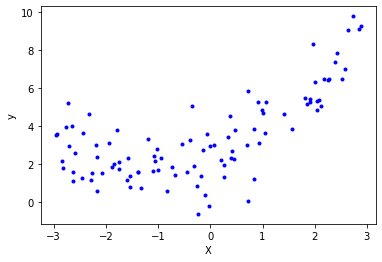

In [46]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

To transform the training data, we use Scikit-Learn's PolynomialFeatures class. We add the square of each feature as new features.
X_poly contains X (the original feature) as well as the square of X.

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([0.91944409, 0.84537743])

Now we can do a standard linear regression on X_poly and y.

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.25294221]), array([[0.97780308, 0.44870548]]))

In [66]:
X_sorted = np.linspace(-3,3,100)
y_poly = lin_reg.coef_[0][1]*X_sorted**2 + lin_reg.coef_[0][0]*X_sorted+lin_reg.intercept_[0]
y_real = 0.5*X_sorted**2 + X_sorted + 2

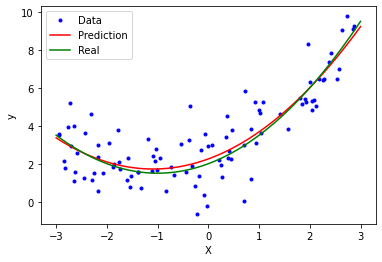

In [69]:
plt.plot(X, y, 'b.', label = "Data")
plt.plot(X_sorted, y_poly, 'r-', label = "Prediction")
plt.plot(X_sorted, y_real, 'g-', label = "Real")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Learning Curves

These are curves of the model performance on the training set and the validation set as a function of training set size (or the training iteration). To generate learning curves, you simple train a model several times on different sized subsets of the training set and evaluate its performace.

The following code defines a function that plots the learning curves of a model given some training data. 

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

Text(0, 0.5, 'RMSE')

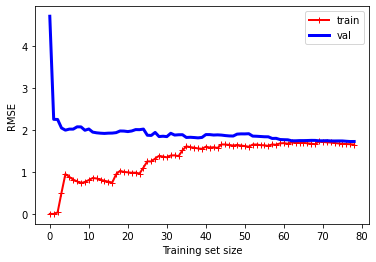

In [74]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")

When the training set is small, the model is able to fit it perfectly, hence the training error starting low. However it generalizes poorly, hence the validation curve starting high. The curve above is typical for an underfitting model. Both curves reach a fairly high, close plateau.

Let's now try fitting a 10th degree polynomial to the same data.

(0.0, 4.0)

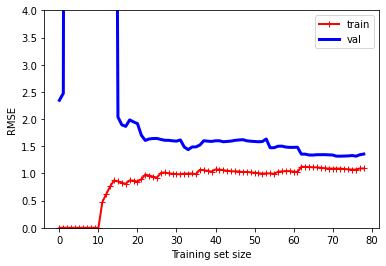

In [80]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.ylim(0,4)

This is an example of overfitting. The error in the training curve is overall lower than for the linear regression example and there is a gap between the training and validation curves that persists.


### Bias/variance tradeoff

A model's generalization error is due to a combination of three different factors:
- Bias: this is due to wrong assumptions, such as assuming quadratic data is linear. A high-bias model most likely leads to underfitting the training data.
- Variance: this is due to the model being very sensitive to small variations in the training set. For example, too high of a degree polynomial will likely have high-variance and overfit the training data.
- Irreducible error: this is due to inherent noisiness of the data. The only way around this is to clean your data.

Increasing a model's comlexity usually increases the variance and decreases the bias and vice versa. Hence, "bias/variance tradeoff".


## Regularized linear models

To reduce overfitting, we can regularize our models (constrain them). The fewer degrees of freedom in the model, the hard it is to overfit the data. A simple way of regularizing a polynomial model is to reduce the degree of the polynomial.

For a linear model, regularization is done by constraining the weights in the model. Here we will looks at three different ways of doing this: Ridge Regression, Lasso Regression, and Elastic Net.

### Ridge regression

Ridge regression is a regularized version of Linear Regression. The following regularization term is added to the cost function. This forces the algorithm to keep the weights as small as possible. Note that the term should only be used during training, it should be removed when evaluating the model's performance.

$$\alpha \Sigma_{i=1}^n \theta_i^2$$

Note that it is common for the cost function used during training to be different from the one used as performance measure.

The hyperparameter $\alpha$ controls how much the model is regularized. If $\alpha=0$, we just have the familiar Linear Regression. If $\alpha$ is very large, then all the weights are basically 0 and the model is just a flat line at the data's mean.

The Ridge Regression cost function is the following. Note that the bias term $\theta_0$ is not included in the sum, it is not regularized.

$$J(\theta) = \mathrm{MSE}(\theta) + \alpha \frac{1}{2} \Sigma_{i=1}^n \theta_i^2$$

Also note that it is important to scale the data prior to performing Ridge Regression.

Like Linear Regression, Ridge Regression can be done either using the closed-form equation, or with Gradient Descent. The closed form is the following (with A being an n+1 x n+1 identity matrix, with the first entry being a zero, corresponding to the bias term not being regularized).

$$ \hat{\theta} = (X^TX + \alpha A)^{-1} X^T y$$

Below we go through an example first of closed-form Ridge Regression with Scikit-Learn and second of Stochastic GD.

In [81]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.88180599]])

In [82]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.84883583])

The penalty hyperparameter above indicates the type of regularization we want to use. Setting it to "l2" indicates that half the square of the l2 norm of the weight vector should be added to the cost function, which is Ridge Regression.

### Lasso regression

Least Absolute Shrinkage and Selection Operator Regression (LASSO for short) is another regularization of Linear Regression. The regularization term added to the cost function is the l1 norm of the weight vector (rather than the l2 norm used in Ridge).

$$J(\theta) = \mathrm{MSE}(\theta) + \alpha \Sigma_{i=1}^n |\theta_i|$$

Lasso Regression tends to completely eliminate (set the weights to zero) the least important features.